In [1]:
#GROUP: B(ML)
#ASSIGNMENT: 6

In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
data = pd.read_csv("uber.csv")
data

Unnamed: 0                            key  fare_amount  \
0         24238194    2015-05-07 19:52:06.0000003          7.5   
1         27835199    2009-07-17 20:04:56.0000002          7.7   
2         44984355   2009-08-24 21:45:00.00000061         12.9   
3         25894730    2009-06-26 08:22:21.0000001          5.3   
4         17610152  2014-08-28 17:47:00.000000188         16.0   
...            ...                            ...          ...   
199995    42598914   2012-10-28 10:49:00.00000053          3.0   
199996    16382965    2014-03-14 01:09:00.0000008          7.5   
199997    27804658   2009-06-29 00:42:00.00000078         30.9   
199998    20259894    2015-05-20 14:56:25.0000004         14.5   
199999    11951496   2010-05-15 04:08:00.00000076         14.1   

                pickup_datetime  pickup_longitude  pickup_latitude  \
0       2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1       2009-07-17 20:04:56 UTC        -73.994355        40.728225   
2       2009-08-24 21:45:00 UTC        -74.005043        40.740770   
3       2009-06-26 08:22:21 UTC        -73.976124        40.790844   
4       2014-08-28 17:47:00 UTC        -73.925023        40.744085   
...                         ...               ...              ...   
199995  2012-10-28 10:49:00 UTC        -73.987042        40.739367   
199996  2014-03-14 01:09:00 UTC        -73.984722        40.736837   
199997  2009-06-29 00:42:00 UTC        -73.986017        40.756487   
199998  2015-05-20 14:56:25 UTC        -73.997124        40.725452   
199999  2010-05-15 04:08:00 UTC        -73.984395        40.720077   

        dropoff_longitude  dropoff_latitude  passenger_count  
0              -73.999512         40.723217                1  
1              -73.994710         40.750325                1  
2              -73.962565         40.772647                1  
3              -73.965316         40.803349                3  
4              -73.973082         40.761247                5  
...                   ...               ...              ...  
199995         -73.986525         40.740297                1  
199996         -74.006672         40.739620                1  
199997         -73.858957         40.692588                2  
199998         -73.983215         40.695415                1  
199999         -73.985508         40.768793                1  

[200000 rows x 9 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [5]:
 data.head()

Unnamed: 0                            key  fare_amount  \
0    24238194    2015-05-07 19:52:06.0000003          7.5   
1    27835199    2009-07-17 20:04:56.0000002          7.7   
2    44984355   2009-08-24 21:45:00.00000061         12.9   
3    25894730    2009-06-26 08:22:21.0000001          5.3   
4    17610152  2014-08-28 17:47:00.000000188         16.0   

           pickup_datetime  pickup_longitude  pickup_latitude  \
0  2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1  2009-07-17 20:04:56 UTC        -73.994355        40.728225   
2  2009-08-24 21:45:00 UTC        -74.005043        40.740770   
3  2009-06-26 08:22:21 UTC        -73.976124        40.790844   
4  2014-08-28 17:47:00 UTC        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  
0         -73.999512         40.723217                1  
1         -73.994710         40.750325                1  
2         -73.962565         40.772647                1  
3         -73.965316         40.803349                3  
4         -73.973082         40.761247                5

In [6]:
data.tail()

Unnamed: 0                           key  fare_amount  \
199995    42598914  2012-10-28 10:49:00.00000053          3.0   
199996    16382965   2014-03-14 01:09:00.0000008          7.5   
199997    27804658  2009-06-29 00:42:00.00000078         30.9   
199998    20259894   2015-05-20 14:56:25.0000004         14.5   
199999    11951496  2010-05-15 04:08:00.00000076         14.1   

                pickup_datetime  pickup_longitude  pickup_latitude  \
199995  2012-10-28 10:49:00 UTC        -73.987042        40.739367   
199996  2014-03-14 01:09:00 UTC        -73.984722        40.736837   
199997  2009-06-29 00:42:00 UTC        -73.986017        40.756487   
199998  2015-05-20 14:56:25 UTC        -73.997124        40.725452   
199999  2010-05-15 04:08:00 UTC        -73.984395        40.720077   

        dropoff_longitude  dropoff_latitude  passenger_count  
199995         -73.986525         40.740297                1  
199996         -74.006672         40.739620                1  
199997         -73.858957         40.692588                2  
199998         -73.983215         40.695415                1  
199999         -73.985508         40.768793                1

In [7]:
data.shape

(200000, 9)

In [8]:
 data.describe()

Unnamed: 0    fare_amount  pickup_longitude  pickup_latitude  \
count  2.000000e+05  200000.000000     200000.000000    200000.000000   
mean   2.771250e+07      11.359955        -72.527638        39.935885   
std    1.601382e+07       9.901776         11.437787         7.720539   
min    1.000000e+00     -52.000000      -1340.648410       -74.015515   
25%    1.382535e+07       6.000000        -73.992065        40.734796   
50%    2.774550e+07       8.500000        -73.981823        40.752592   
75%    4.155530e+07      12.500000        -73.967154        40.767158   
max    5.542357e+07     499.000000         57.418457      1644.421482   

       dropoff_longitude  dropoff_latitude  passenger_count  
count      199999.000000     199999.000000    200000.000000  
mean          -72.525292         39.923890         1.684535  
std            13.117408          6.794829         1.385997  
min         -3356.666300       -881.985513         0.000000  
25%           -73.991407         40.733823         1.000000  
50%           -73.980093         40.753042         1.000000  
75%           -73.963658         40.768001         2.000000  
max          1153.572603        872.697628       208.000000

In [9]:
data.dtypes

Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [10]:
 #Data Preprocessing
data.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [11]:
data.drop(columns='Unnamed: 0', inplace=True)

In [12]:
data = data.dropna()

In [13]:
data.isnull().sum()


key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [14]:
data.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [15]:
# Filter the data to keep only fare_amount greater than 0
data = data[data['fare_amount'] > 0]
data["pickup_datetime"] = data["pickup_datetime"].astype(str)
data["pickup_datetime"] = data["pickup_datetime"].apply(lambda x: x.split(' ')[0])
data["pickup_datetime"] = pd.to_datetime(data["pickup_datetime"], errors='coerce')
data["pickup_year"] = data["pickup_datetime"].dt.year

In [16]:
data.drop(columns=['key','pickup_datetime'],inplace=True)

In [17]:
data.head()

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
0          7.5        -73.999817        40.738354         -73.999512   
1          7.7        -73.994355        40.728225         -73.994710   
2         12.9        -74.005043        40.740770         -73.962565   
3          5.3        -73.976124        40.790844         -73.965316   
4         16.0        -73.925023        40.744085         -73.973082   

   dropoff_latitude  passenger_count  pickup_year  
0         40.723217                1         2015  
1         40.750325                1         2009  
2         40.772647                1         2009  
3         40.803349                3         2009  
4         40.761247                5         2014

In [18]:
#Correlationx
x = data.drop(['fare_amount'], axis=1)
y = data['fare_amount']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state=0)


In [19]:
data.corr()

fare_amount  pickup_longitude  pickup_latitude  \
fare_amount           1.000000          0.010468        -0.008489   
pickup_longitude      0.010468          1.000000        -0.816434   
pickup_latitude      -0.008489         -0.816434         1.000000   
dropoff_longitude     0.009208          0.833132        -0.774880   
dropoff_latitude     -0.011250         -0.846449         0.702450   
passenger_count       0.010422         -0.000488        -0.001500   
pickup_year           0.118531          0.009921        -0.010197   

                   dropoff_longitude  dropoff_latitude  passenger_count  \
fare_amount                 0.009208         -0.011250         0.010422   
pickup_longitude            0.833132         -0.846449        -0.000488   
pickup_latitude            -0.774880          0.702450        -0.001500   
dropoff_longitude           1.000000         -0.916971        -0.000104   
dropoff_latitude           -0.916971          1.000000        -0.000514   
passenger_count            -0.000104         -0.000514         1.000000   
pickup_year                 0.008330         -0.011094         0.004790   

                   pickup_year  
fare_amount           0.118531  
pickup_longitude      0.009921  
pickup_latitude      -0.010197  
dropoff_longitude     0.008330  
dropoff_latitude     -0.011094  
passenger_count       0.004790  
pickup_year           1.000000

<Axes: ylabel='fare_amount'>

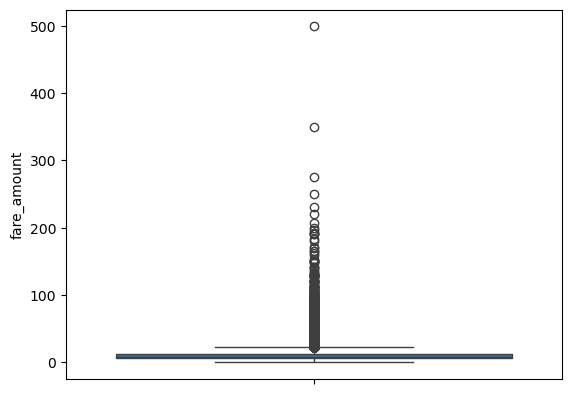

In [20]:
 #Outlier
sns.boxplot(data['fare_amount'])

In [21]:
data.head()

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
0          7.5        -73.999817        40.738354         -73.999512   
1          7.7        -73.994355        40.728225         -73.994710   
2         12.9        -74.005043        40.740770         -73.962565   
3          5.3        -73.976124        40.790844         -73.965316   
4         16.0        -73.925023        40.744085         -73.973082   

   dropoff_latitude  passenger_count  pickup_year  
0         40.723217                1         2015  
1         40.750325                1         2009  
2         40.772647                1         2009  
3         40.803349                3         2009  
4         40.761247                5         2014

In [22]:
 Q1 = np.percentile(data['fare_amount'], 25, interpolation= 'midpoint')
Q3 = np.percentile(data['fare_amount'], 25, interpolation= 'midpoint')
print(Q1,Q3)

6.0 6.0


<Axes: xlabel='fare_amount'>

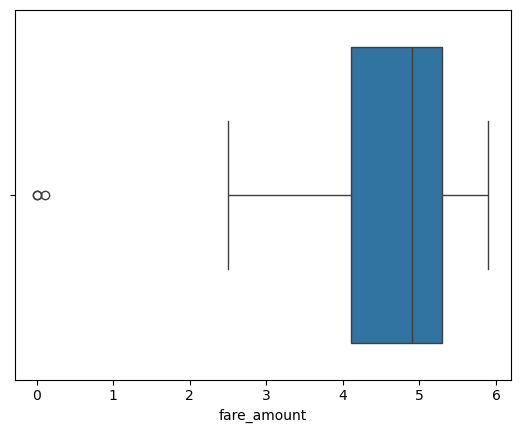

In [23]:
data.drop(data[data['fare_amount'] >= 6.0].index, inplace=True)
sns.boxplot(x=data['fare_amount'])

In [24]:
data.head()

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
3           5.3        -73.976124        40.790844         -73.965316   
5           4.9        -73.969019        40.755910         -73.969019   
7           2.5          0.000000         0.000000           0.000000   
12          3.3        -73.966378        40.804440         -73.965890   
16          4.9        -73.988908        40.756982         -73.981246   

    dropoff_latitude  passenger_count  pickup_year  
3          40.803349                3         2009  
5          40.755910                1         2011  
7           0.000000                1         2012  
12         40.807133                5         2011  
16         40.760050                1         2011

In [25]:
 #Linear Regression model
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
y_pred_lr = lr_model.predict(x_test)
print(y_pred_lr)

[ 9.58475301  9.58495194 12.17459111 ... 11.54223857 11.60110516
 11.48083645]


In [26]:
def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} RMSE: {rmse:.2f}")
    print(f"{model_name} R-squared (R2): {r2:.2f}")
# Example call
evaluate_model(y_test, y_pred_lr, "Linear Regression")

Linear Regression RMSE: 9.75
Linear Regression R-squared (R2): 0.01


In [59]:
#Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)
print(y_pred_rf)

[ 9.909   7.951  20.9993 ...  6.368  20.167   8.61  ]


In [57]:
def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} RMSE: {rmse:.2f}")
    print(f"{model_name} R-squared (R2): {r2:.2f}")
evaluate_model(y_test, y_pred_rf, "Random Forest Regression")

Random Forest Regression RMSE: 4.74
Random Forest Regression R-squared (R2): 0.77
